<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonDeepLearning/blob/main/Fasion_mnist_Practice_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras - Fasion MNIST
CNN으로 분류모델 만들기


In [1]:
import warnings
warnings.filterwarnings('ignore')

## 0.Import Tensorflow & Keras
* import Keras

In [2]:
import keras

keras.__version__

'2.4.3'

* import Tensorflow

In [3]:
import tensorflow as tf

tf.__version__

'2.4.1'

* GPU 확인

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

## 1.Fasion MNIST Data_Set Load & Review



### 1)Load Fasion MNIST Data_Set

In [5]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

* Train_Data Information

In [6]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[9 0 0 3 0]


* Test_Data Information

In [7]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[9 2 1 1 6]


### 2)Visualization

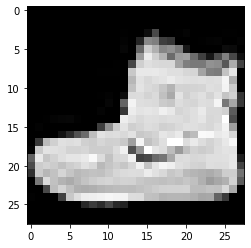

In [8]:
import matplotlib.pyplot as plt

# 어떤 이미지인지 확인하기(흑백)
digit = X_train[0]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [9]:
import numpy as np

# 2차원 행렬로 확인하기
np.set_printoptions(linewidth = 150)

print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

## 2.Data Preprocessing


### 1)Reshape and Normalization
* reshape

In [10]:
#CNN을 적용하기 위해 reshape한다
X_train = X_train.reshape((60000, 28 , 28, 1))
X_test = X_test.reshape((10000, 28 , 28, 1))

* Normaliztion

In [11]:
# model에 집어넣기 위해 데이터를 실수화 한 후 정규화시킨다
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

### 2)One Hot Encoding

In [12]:
from keras.utils import to_categorical

#결과값을 인코딩한 후 실수형으로 만든다(1.값이 존재하는 인덱스가 실제 y값에 해당)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 3.MNIST Keras Modeling


### 1)Model Define

* Feature Extraction Layer

In [13]:
from keras import models
from keras import layers

#CNN
mnist = models.Sequential()
mnist.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
mnist.add(layers.MaxPool2D(pool_size = (2,2)))
mnist.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
mnist.add(layers.MaxPool2D(pool_size = (2,2)))
mnist.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))

In [14]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


* Classification Layer

In [15]:
#DNN
mnist.add(layers.Flatten())
mnist.add(layers.Dense(units = 64, activation = 'relu'))
mnist.add(layers.Dense(units = 10, activation = 'softmax'))

In [16]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### 2)Model Compile

In [17]:
mnist.compile(loss = 'categorical_crossentropy', #다중분류모델
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

### 3)Model Fit

In [18]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 33s 7ms/step - loss: 0.9590 - accuracy: 0.6621 - val_loss: 0.4521 - val_accuracy: 0.8356
Epoch 2/100
375/375 [==============================] - 2s 6ms/step - loss: 0.4206 - accuracy: 0.8455 - val_loss: 0.3535 - val_accuracy: 0.8716
Epoch 3/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3455 - accuracy: 0.8743 - val_loss: 0.3203 - val_accuracy: 0.8828
Epoch 4/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3049 - accuracy: 0.8882 - val_loss: 0.3084 - val_accuracy: 0.8896
Epoch 5/100
375/375 [==============================] - 2s 5ms/step - loss: 0.2756 - accuracy: 0.8999 - val_loss: 0.2880 - val_accuracy: 0.8957
Epoch 6/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2426 - accuracy: 0.9119 - val_loss: 0.2759 - val_accuracy: 0.9015
Epoch 7/100
375/375 [==============================] - 2s 6ms/step - loss: 0.2276 - accuracy: 0.9159 - val_loss: 0.2643 - val_accuracy: 0.907

### 4)Result Visualization

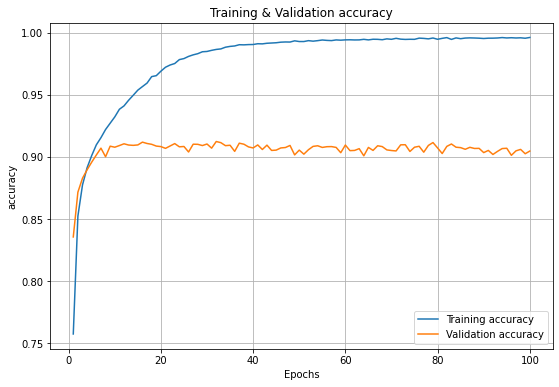

In [23]:
epochs = range(1, len(Hist_mnist.history['accuracy']) + 1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_mnist.history['accuracy'])
plt.plot(epochs, Hist_mnist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()
#DNN만 사용했을 때 보다 accuracy가 높아졌다(90% 넘음) => capacity가 향상되었다

### 5)Model Evaluate
* Loss & Accuracy

In [24]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 1.4317 - accuracy: 0.9058
Loss = 1.43172
Accuracy = 0.90580


### 6)Model Predict

In [25]:
#첫번째 데이터 Probability
np.set_printoptions(suppress=True, precision=9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [26]:
#첫번째 데이터 Class
print(mnist.predict_classes(X_test[:1, :]))

[9]


본 내용은 2021/03/19(금)에 작성되었습니다.